In [32]:
# Here we are working with Fashion Image Classification (CNN)

# This dataset contains different class of images belonging to fashion such as Tshirt, tops, ankleboots etc.

# We will try to build a streamlit web app and when we give it an image it should predict weather what that object is.

In [2]:
import random
random.seed(0)

import pandas as pd
import numpy as np
random.seed(0)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.random.set_seed(0)
from tensorflow import keras

from keras.datasets import fashion_mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
print(X_train[0].shape)

(28, 28)


In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

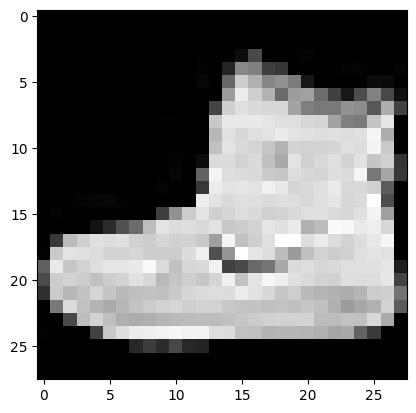

In [10]:
plt.imshow(X_train[0], cmap='gray')

In [11]:
print(Y_train[0])

9


In [12]:
X_train = X_train/255

In [13]:
X_test = X_test/255

In [15]:
X_train.shape[0]

60000

In [14]:
# Reshaping the images

X_train = X_train.reshape((X_train.shape[0], 28,28,1))

### **Building our CNN**

In [19]:
model = keras.Sequential([keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(10)
                          ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9475 - loss: 0.1403 - val_accuracy: 0.9342 - val_loss: 0.1773
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9538 - loss: 0.1217 - val_accuracy: 0.9345 - val_loss: 0.1808
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9575 - loss: 0.1134 - val_accuracy: 0.9337 - val_loss: 0.1862
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9608 - loss: 0.1021 - val_accuracy: 0.9222 - val_loss: 0.2341
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9626 - loss: 0.1001 - val_accuracy: 0.9242 - val_loss: 0.2308
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.0944 - val_accuracy: 0.9267 - val_loss: 0.2351
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.0914 - val_accuracy: 0.9248 - val_loss: 0.2796
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9666 - loss: 0.0897 - 

In [26]:
history2 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9578 - loss: 0.1174 - val_accuracy: 0.8855 - val_loss: 0.5188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9655 - loss: 0.0926 - val_accuracy: 0.8771 - val_loss: 0.5803
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.0874 - val_accuracy: 0.8854 - val_loss: 0.5447
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9673 - loss: 0.0894 - val_accuracy: 0.8864 - val_loss: 0.5704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9683 - loss: 0.0846 - val_accuracy: 0.8855 - val_loss: 0.5963
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9701 - loss: 0.0801 - val_accuracy: 0.8854 - val_loss: 0.6643
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9706 - loss: 0.0757 - val_accuracy: 0.8779 - val_loss: 0.6825
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.0740 -

In [27]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.8117


[0.7827001810073853, 0.8788999915122986]

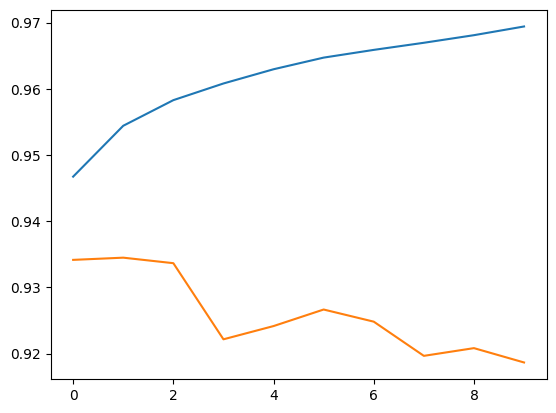

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

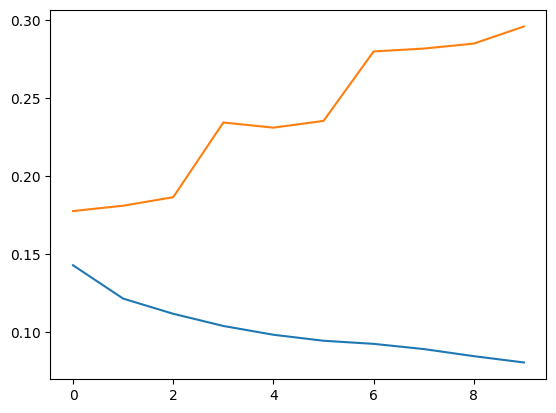

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [31]:
model.save('trained_fashion.h5')

In [ ]:
# After it's all done our site will look like this